In [2]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:
input_file = "../data/raw/household.csv"
#output_path = "../../data/synthetic_fishing/"


In [4]:
full_data = pd.read_csv(input_file, index_col=0)


In [5]:
# Check for NaN or null values in the dataset
nan_summary = full_data.isnull().sum()

# Total number of NaN values in the dataset
total_nan = full_data.isnull().sum().sum()

# Display columns with NaN values and their counts
print("NaN Counts Per Column:")
print(nan_summary[nan_summary > 0])  # Show only columns with NaN values

print(f"\nTotal number of NaN values in the dataset: {total_nan}")


NaN Counts Per Column:
conso                      1
Global_reactive_power      1
Voltage                    1
Global_intensity           1
Sub_metering_1             1
Sub_metering_2             1
Sub_metering_3           437
dtype: int64

Total number of NaN values in the dataset: 443


In [46]:
#full_data = full_data.fillna(0).dropna()
full_data = full_data.dropna()


In [47]:
full_data.describe()


,Sub_metering_3
count,34152.000000
mean,6.506032
std,8.461815
min,0.000000
25%,0.000000
50%,1.000000
75%,17.000000
max,31.000000


In [48]:
full_data.columns


Index(['conso', 'Global_reactive_power', 'Voltage', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'],
      dtype='object')

In [49]:
full_data.info


<bound method DataFrame.info of                      conso Global_reactive_power  Voltage Global_intensity  \
date                                                                         
2006-12-16 18:00:00  2.790                 0.180  237.520           11.800   
2006-12-16 19:00:00  4.070                 0.088  231.990           17.400   
2006-12-16 20:00:00  3.206                 0.078  232.430           13.800   
2006-12-16 21:00:00  3.314                 0.072  236.760           14.000   
2006-12-16 22:00:00  3.464                 0.170  236.030           14.600   
...                    ...                   ...      ...              ...   
2010-11-26 17:00:00  0.898                   0.0   237.22              3.8   
2010-11-26 18:00:00  1.096                 0.142   239.14              4.6   
2010-11-26 19:00:00   1.81                   0.0   235.59              7.6   
2010-11-26 20:00:00  1.456                   0.0   238.18              6.2   
2010-11-26 21:00:00  0.938      

In [50]:
full_data.head()


,conso,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2006-12-16 18:00:00,2.790,0.180,237.520,11.800,0.000,0.000,18.0
2006-12-16 19:00:00,4.070,0.088,231.990,17.400,0.000,1.000,17.0
2006-12-16 20:00:00,3.206,0.078,232.430,13.800,0.000,0.000,16.0
2006-12-16 21:00:00,3.314,0.072,236.760,14.000,0.000,0.000,17.0
2006-12-16 22:00:00,3.464,0.170,236.030,14.600,0.000,1.000,17.0


In [51]:
full_data.tail()


,conso,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
date,,,,,,,
2010-11-26 17:00:00,0.898,0.0,237.22,3.8,0.0,0.0,0.0
2010-11-26 18:00:00,1.096,0.142,239.14,4.6,0.0,0.0,0.0
2010-11-26 19:00:00,1.81,0.0,235.59,7.6,0.0,0.0,0.0
2010-11-26 20:00:00,1.456,0.0,238.18,6.2,0.0,2.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0


In [52]:
df = full_data.copy()


In [53]:
l, sh, dim, siz = len(df), df.shape, df.ndim, df.size


In [54]:
print(l, sh, dim, siz)


34152 (34152, 7) 2 239064


In [55]:
rdf = df.to_numpy().reshape(df.shape[0], df.shape[1], 1)
rdf.shape


(34152, 7, 1)

array([<Axes: ylabel='Frequency'>], dtype=object)

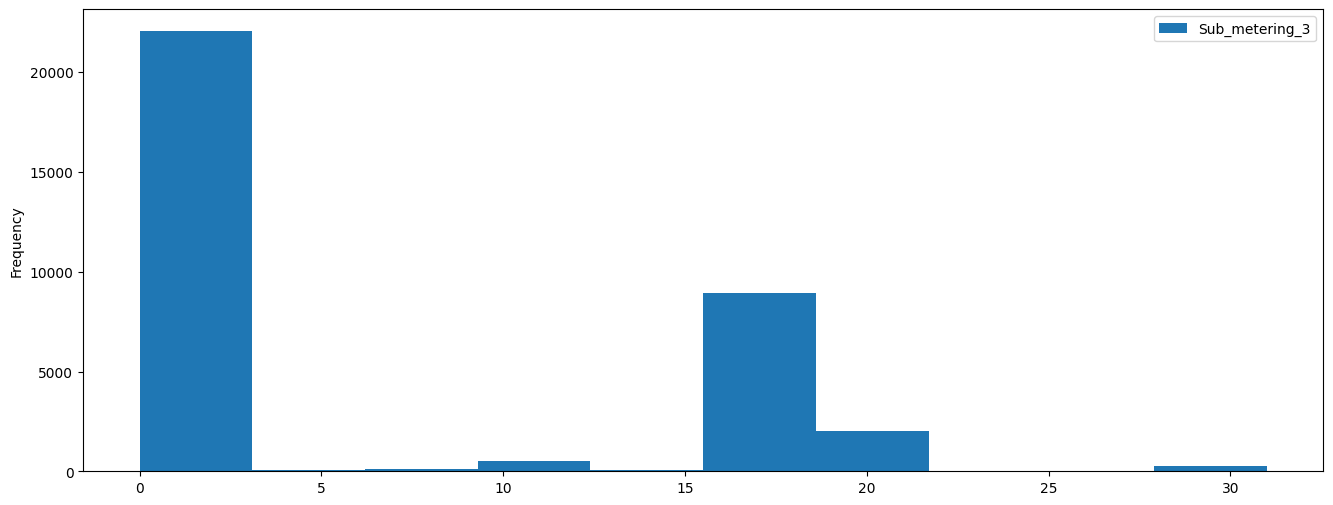

In [56]:
df.plot(kind='hist', subplots=True, figsize=(16, 6))


array([[<Axes: title={'center': 'Sub_metering_3'}>]], dtype=object)

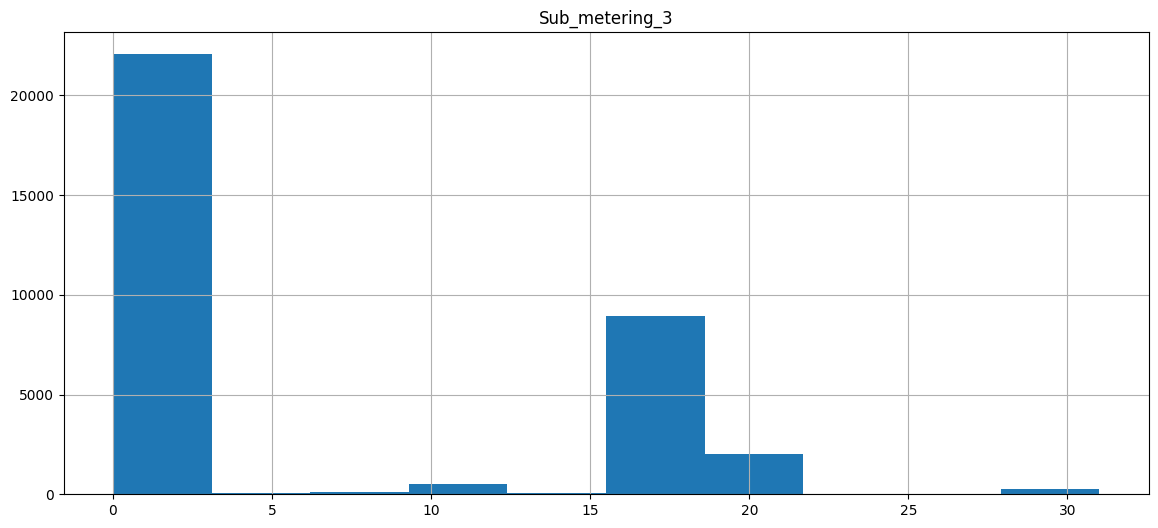

In [57]:
df.hist(figsize=(14, 6))


<Axes: xlabel='conso', ylabel='Global_reactive_power'>

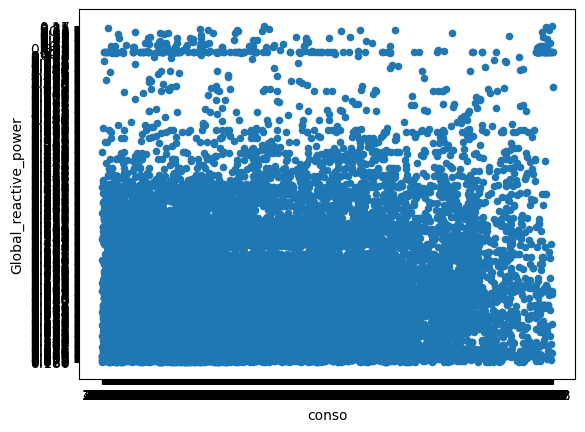

In [58]:
df.plot.scatter(x="conso", y="Global_reactive_power")


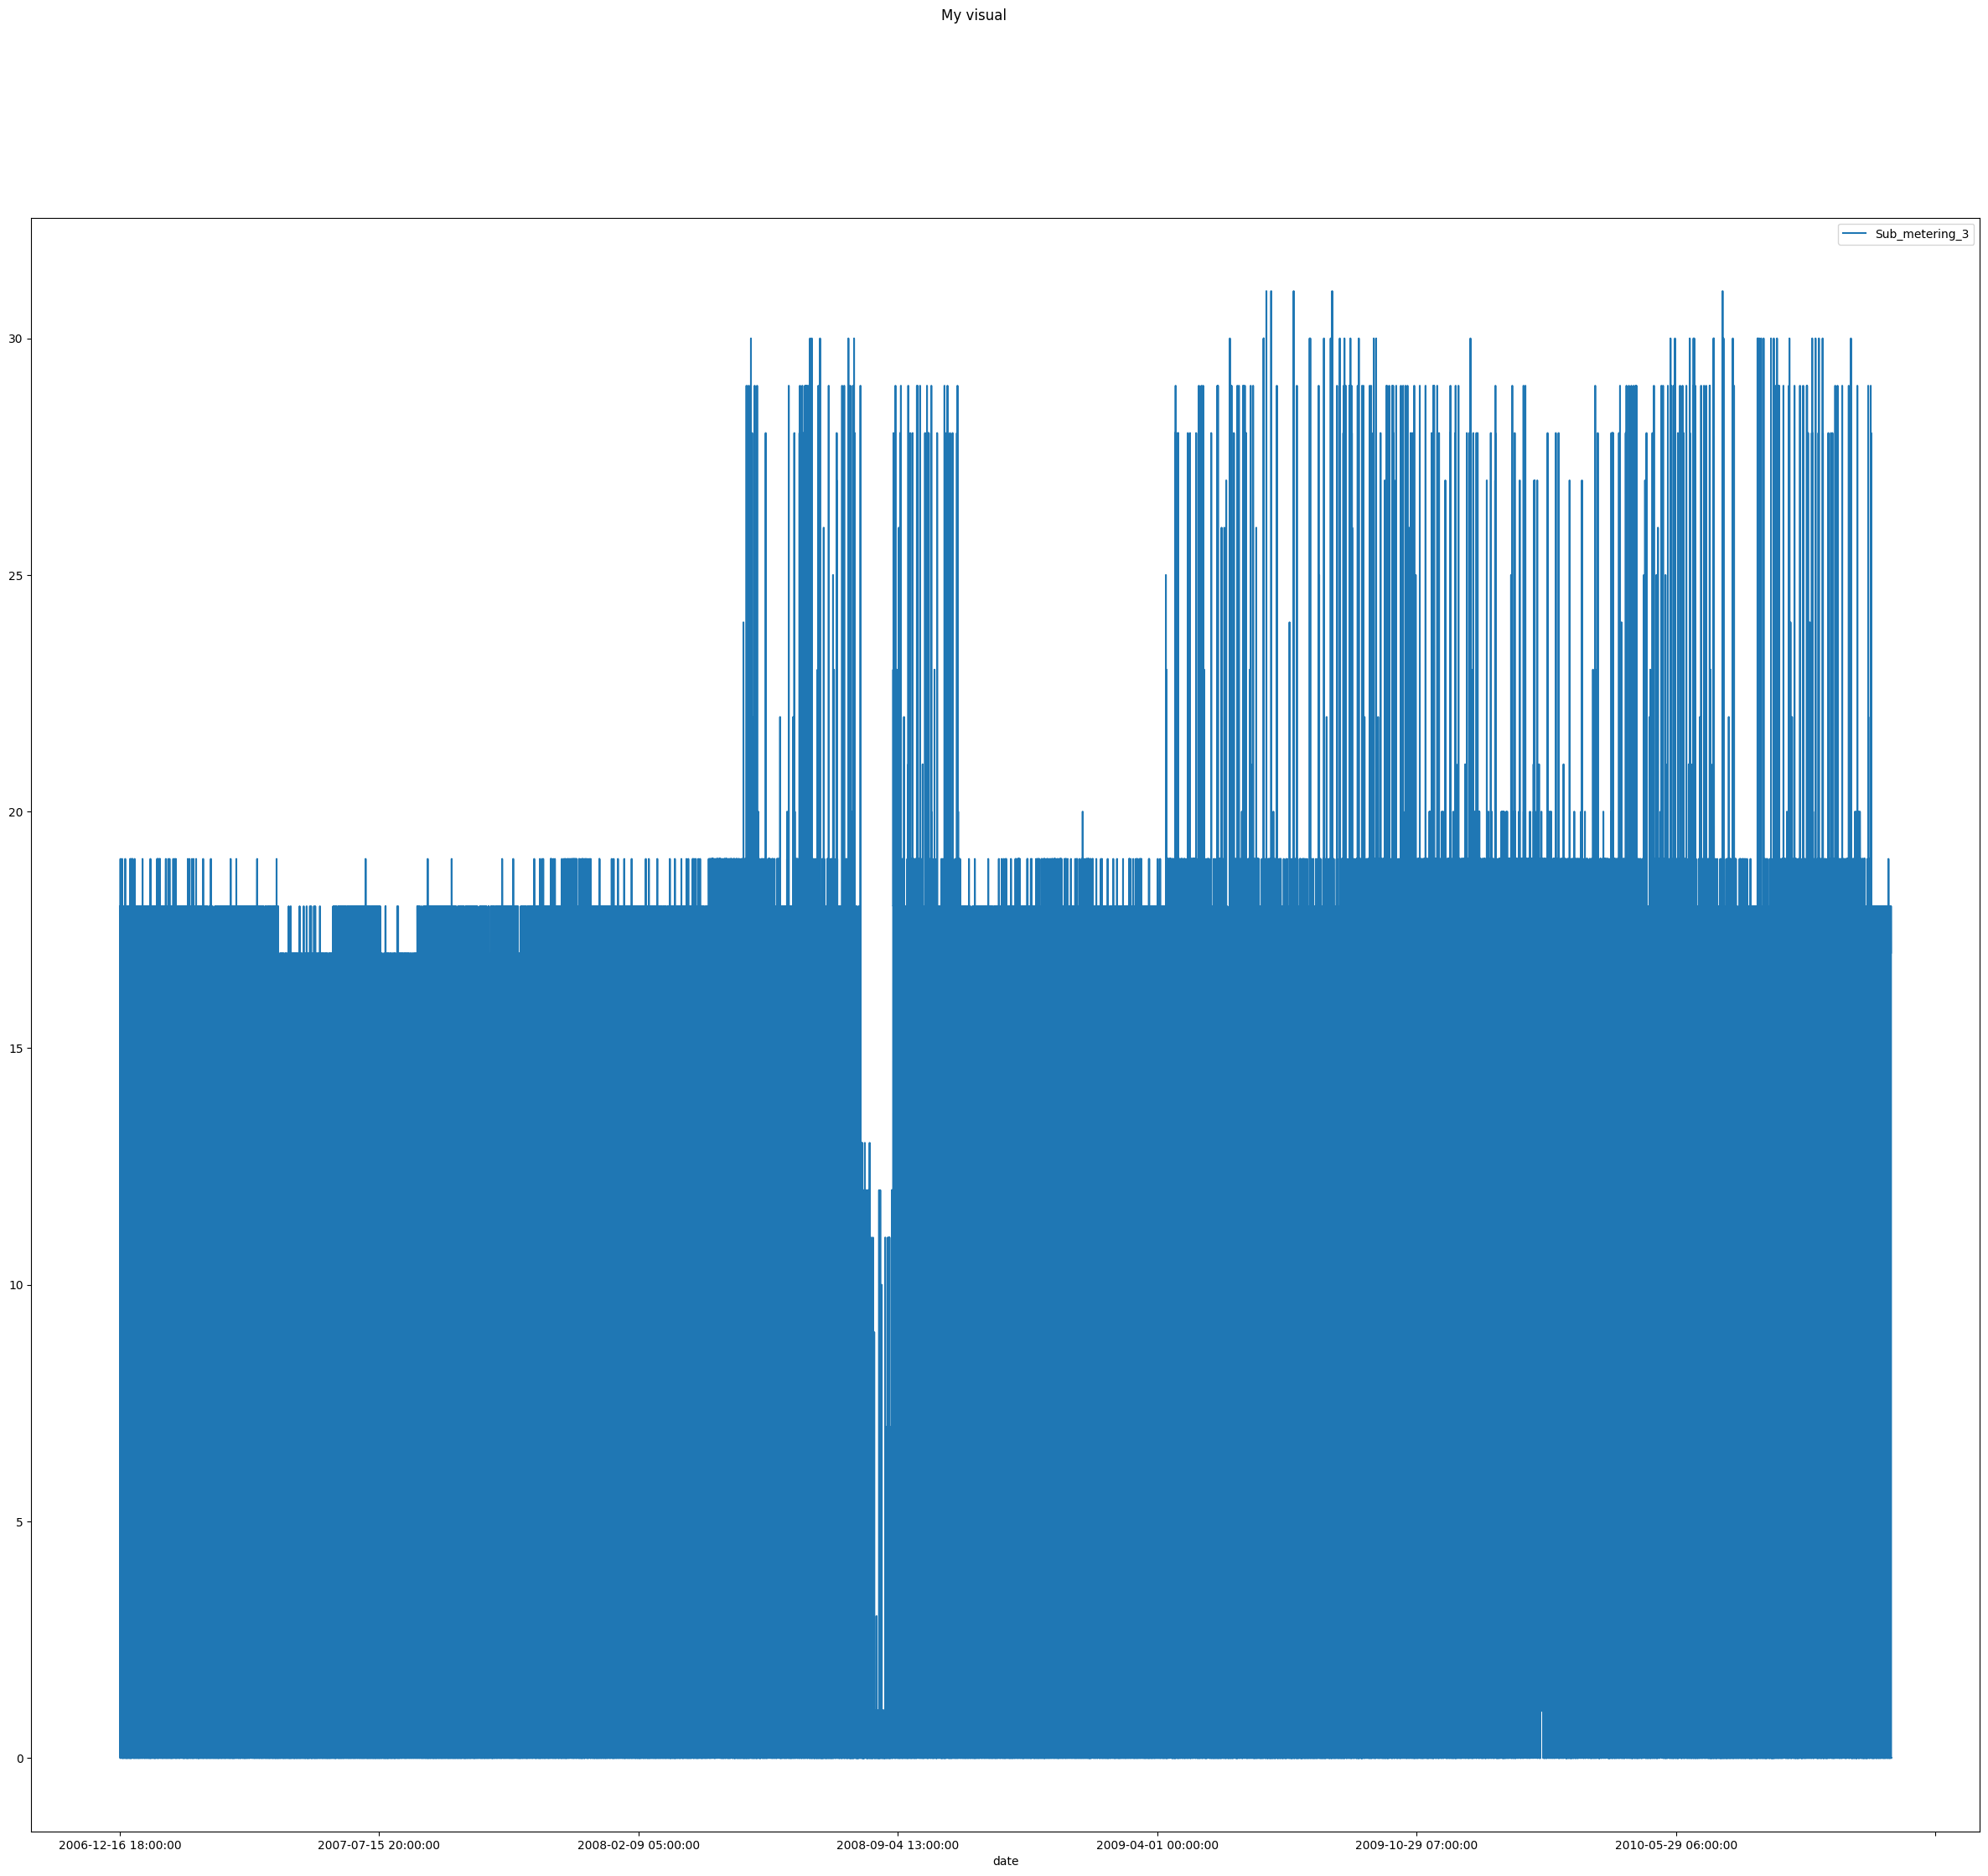

In [59]:
df.plot(subplots=True, figsize=(30, 25), title="My visual")
plt.show()


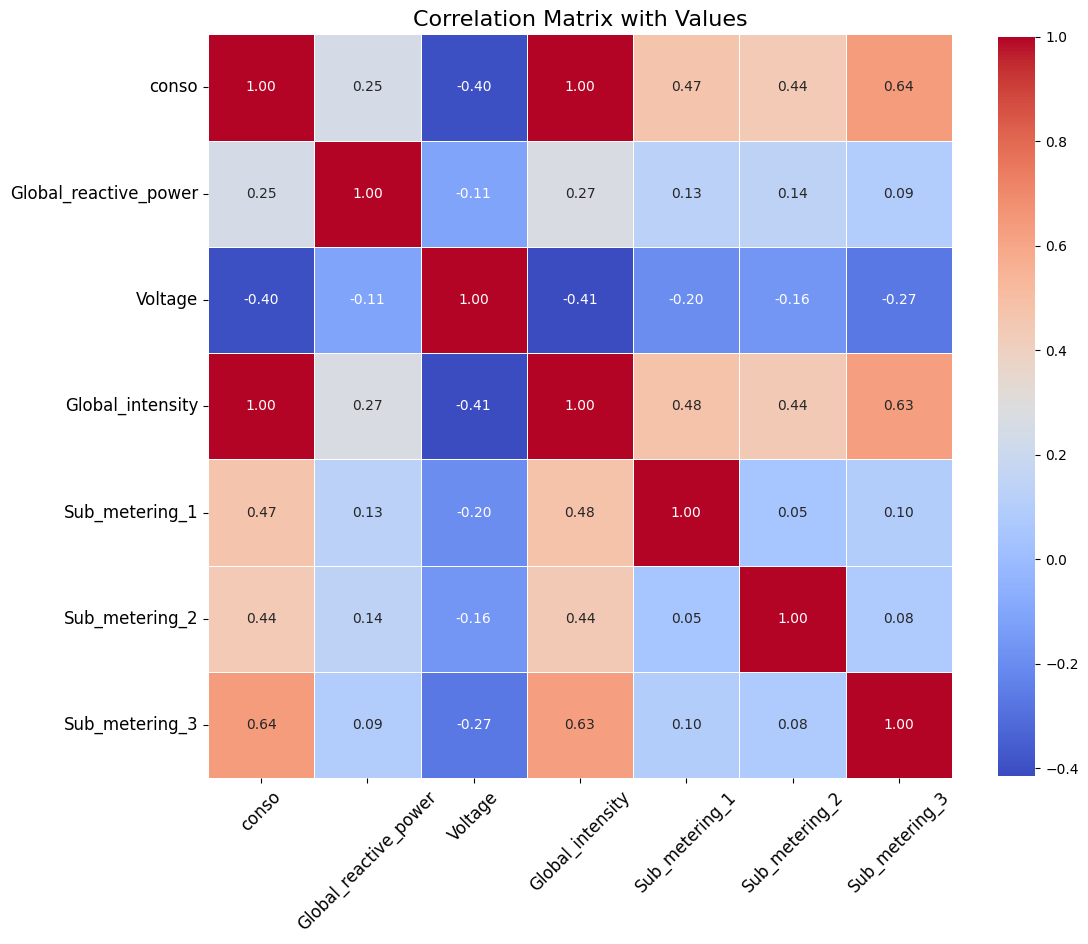

In [60]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()


In [67]:
df_ = df.copy()
df_.drop(columns=['Voltage'], inplace=True)
save_path = "../data/raw/household_data.csv"
df_.to_csv(save_path, index=True)
print(f"Processed dataset saved to {save_path}")


Processed dataset saved to ../data/raw/household_data.csv


In [68]:
new_data = pd.read_csv(save_path, index_col=0)


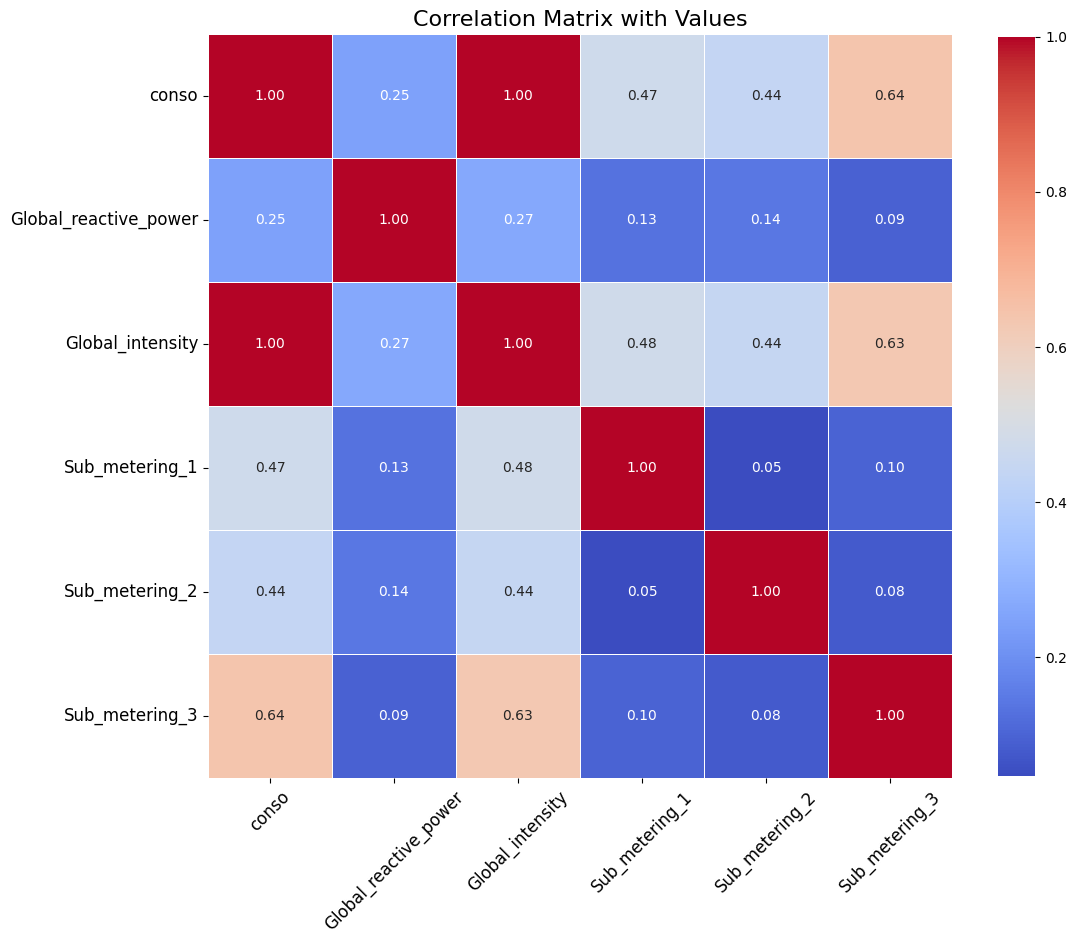

In [69]:
# Calculate the correlation matrix
corr_matrix = new_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 12))  # Adjust figure size
sns.heatmap(
    corr_matrix,
    annot=True,            # Show correlation values on the heatmap
    fmt=".2f",             # Format values to 2 decimal places
    cmap="coolwarm",       # Diverging color map (red = negative, blue = positive)
    square=True,           # Keep cells square-shaped
    linewidths=0.5,        # Add clear grid lines between cells
    cbar_kws={"shrink": 0.8}  # Shrink the color bar
)

# Add labels and a title
plt.title("Correlation Matrix with Values", fontsize=16)
plt.xticks(fontsize=12, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.show()
